### Soil data column index
- fips: US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
- lat: Latitude -->
- lon: Longitude
- elevation: Median elevation (meters)
- slope1: 0 % ≤ slope ≤ 0.5 %
- slope2: 0.5 % ≤ slope ≤ 2 %
- slope3: 2 % ≤ slope ≤ 5 %
- slope4: 5 % ≤ slope ≤ 10 %
- slope5: 10 % ≤ slope ≤ 15 %
- slope6: 15 % ≤ slope ≤ 30 %
- slope7: 30 % ≤ slope ≤ 45 %
- slope8: Slope > 45 %
- aspectN: North: 0˚< aspect ≤45˚ or 315˚< aspect ≤360˚
- aspectE: East: 45˚ < aspect ≤ 135
- aspectS: South: 135˚ < aspect ≤ 225˚
- aspectW: West: 225˚ < aspect ≤ 315˚
- aspectUnknown: Undefined: Slope aspect undefined; this value is used for grids where slope gradient is undefined or slope gradient is less than 2%.
- WAT_LAND: mapped water bodies
- NVG_LAND: barren/very sparsely vegetated land
- URB_LAND: built-up land (residential and infrastructure)
- GRS_LAND: grass/scrub/woodland
- FOR_LAND: forest land, calibrated to FRA2000 land statistics
- CULTRF_LAND: 
- CULTIR_LAND: irrigated cultivated land, according to GMIA 4.0
- CULT_LAND: total cultivated land
- SQ1: Nutrient availability
- SQ2: Nutrient retention capacity
- SQ3: Rooting conditions
- SQ4: Oxygen availability to roots
- SQ5: Excess salts.
- SQ6: Toxicity
- SQ7: Workability (constraining field management)

### Weather data column index
- fips: US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
- date: observation date
- PRECTOT = Precipitation (mm day-1)
- PS = Surface Pressure (kPa)
- QV2M = Specific Humidity at 2 Meters (g/kg)
- T2M = Temperature at 2 Meters (C)
- T2MDEW = Dew/Frost Point at 2 Meters (C)
- T2MWET = Wet Bulb Temperature at 2 Meters (C)
- T2M_MAX = Maximum Temperature at 2 Meters (C)
- T2M_MIN = Minimum Temperature at 2 Meters (C)
- T2M_RANGE = Temperature Range at 2 Meters (C)
- TS = Earth Skin Temperature (C)
- WS10M = Wind Speed at 10 Meters (m/s)
- WS10M_MAX = Maximum Wind Speed at 10 Meters (m/s)
- WS10M_MIN = Minimum Wind Speed at 10 Meters (m/s)
- WS10M_RANGE = Wind Speed Range at 10 Meters (m/s)
- WS50M = Wind Speed at 50 Meters (m/s)
- WS50M_MAX = Maximum Wind Speed at 50 Meters (m/s)
- WS50M_MIN = Minimum Wind Speed at 50 Meters (m/s)
- WS50M_RANGE = Wind Speed Range at 50 Meters (m/s)
- score:




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
%matplotlib inline

### Import data

In [2]:
path = 'data/'

In [3]:
train=pd.read_csv(path+'train_timeseries.csv')

In [4]:
valid=pd.read_csv(path+'validation_timeseries.csv')

In [5]:
test=pd.read_csv(path+'test_timeseries.csv')

In [6]:
train_data = train.shape[0]
validation_data = valid.shape[0]
test_data = test.shape[0]
total = train_data+test_data+validation_data

print('Train     ',train_data,'', str(round(train_data/total*100,2))+'%')
print('Validation ',validation_data,' ', str(round(validation_data/total*100,2))+'%')
print('Test       ',test_data,' ', str(round(test_data/total*100,2))+'%')
print('Total     ',total,'100.00%')

Train      19300680  80.95%
Validation  2268840   9.52%
Test        2271948   9.53%
Total      23841468 100.00%


### Data preprocessing

In [8]:
# training data preprocessing
train['date'] = pd.to_datetime(train['date']) # parse date.
train['score'] = train['score'].apply(pd.to_numeric).interpolate()
train['drought_level'] = np.floor(train['score']) # classify drought level.
train.drop(columns=['fips', 'score'], inplace=True) # remove un-necessary columns.
train.dropna(inplace=True) # remove all examples containing NaN.

# validation data preprocessing
valid['date'] = pd.to_datetime(valid['date']) # parse date.
valid['score'] = valid['score'].apply(pd.to_numeric).interpolate()
valid['drought_level'] = np.floor(valid['score']) # classify drought level.
valid.drop(columns=['fips', 'score'], inplace=True) # remove un-necessary columns.
valid.dropna(inplace=True) # remove all examples containing NaN.

# testing data preprocessing
test['date'] = pd.to_datetime(test['date']) # parse date.
test['score'] = test['score'].apply(pd.to_numeric).interpolate()
test['drought_level'] = np.floor(test['score']) # classify drought level.
test.drop(columns=['fips', 'score'], inplace=True) # remove un-necessary columns.
test.dropna(inplace=True) # remove all examples containing NaN.

In [9]:
train_data = train.shape[0]
validation_data = valid.shape[0]
test_data = test.shape[0]
total = train_data+test_data+validation_data

print('Train     ',train_data,'', str(round(train_data/total*100,2))+'%')
print('Validation ',validation_data,' ', str(round(validation_data/total*100,2))+'%')
print('Test       ',test_data,' ', str(round(test_data/total*100,2))+'%')
print('Total     ',total,'100.00%')

Train      19300677  80.95%
Validation  2268838   9.52%
Test        2271948   9.53%
Total      23841463 100.00%


In [10]:
train.head() # check the data

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,drought_level
3,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,1.0
5,2000-01-06,0.01,101.31,3.49,4.99,-1.11,-1.07,12.89,-2.96,15.85,3.32,1.55,2.39,0.04,2.35,2.95,5.22,0.05,5.17,1.0
6,2000-01-07,0.01,101.37,3.93,5.99,0.55,0.58,14.51,0.63,13.88,5.69,2.31,3.28,1.59,1.69,5.02,6.47,2.44,4.03,1.0
7,2000-01-08,1.02,100.77,5.71,8.69,5.33,5.34,15.78,2.74,13.04,8.75,2.05,2.91,1.50,1.40,4.17,5.73,2.01,3.72,1.0


### EDA

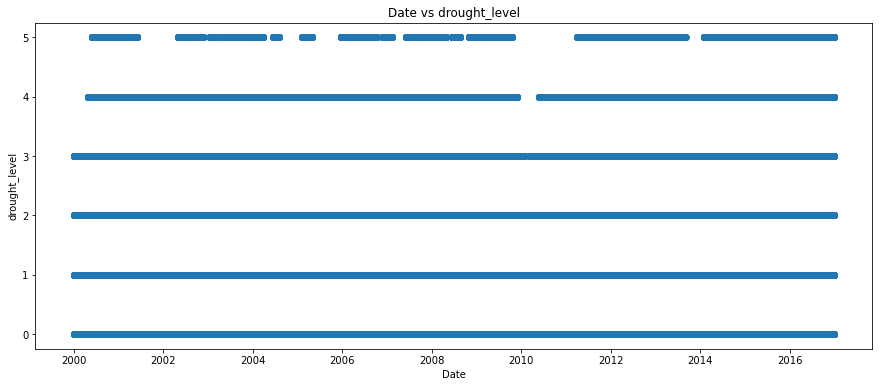

In [11]:
plt.figure(figsize=(15, 6))
plt.scatter(train['date'], train.iloc[:,-1])
plt.title('Date vs ' + train.columns[-1])
plt.xlabel('Date')
plt.ylabel(train.columns[-1])
plt.savefig('Date vs '+ train.columns[-1])
plt.show();

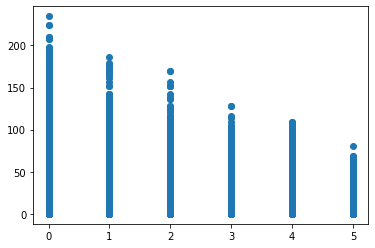

In [12]:
plt.scatter(train['drought_level'], train['PRECTOT'])
plt.show()

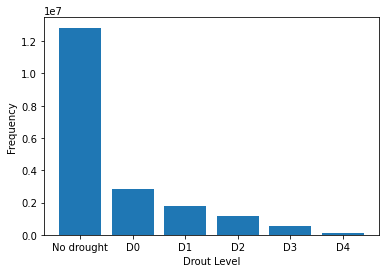

In [13]:
Drout_Level = ['No drought', 'D0', 'D1', 'D2', 'D3', 'D4']
frequency = [np.sum(train['drought_level']==0),
             np.sum(train['drought_level']==1),
             np.sum(train['drought_level']==2),
             np.sum(train['drought_level']==3),
             np.sum(train['drought_level']==4),
             np.sum(train['drought_level']==5)
            ]

plt.bar(Drout_Level, frequency)
plt.xlabel('Drout Level')
plt.ylabel('Frequency')
plt.savefig('Drout_Level_barchart')
plt.show();

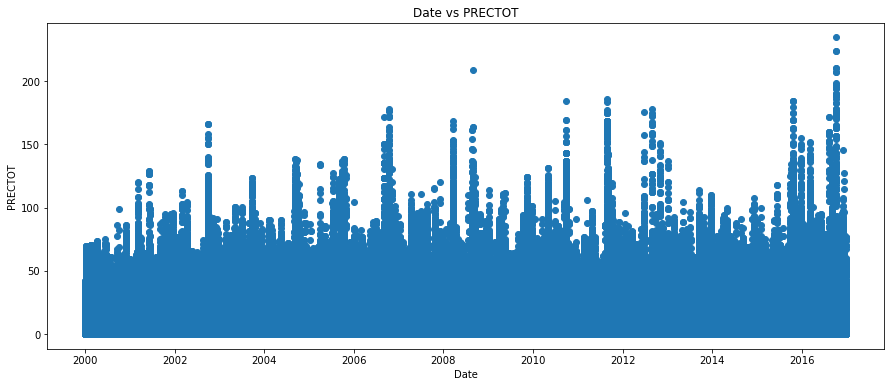

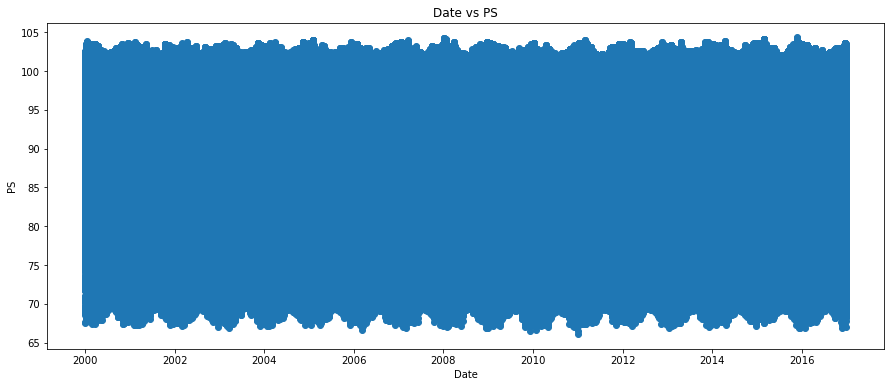

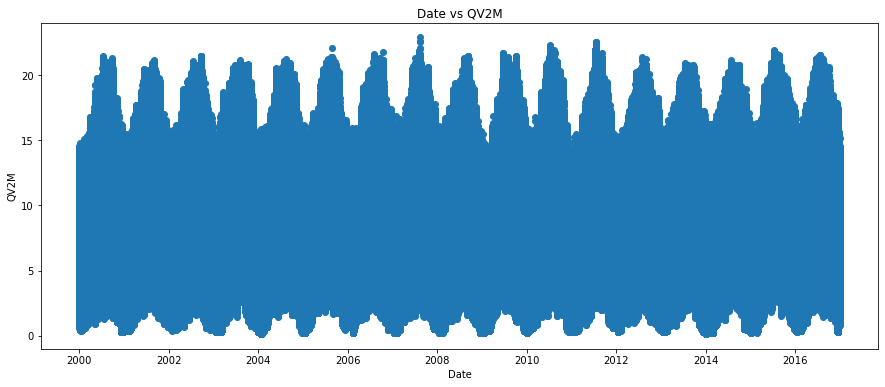

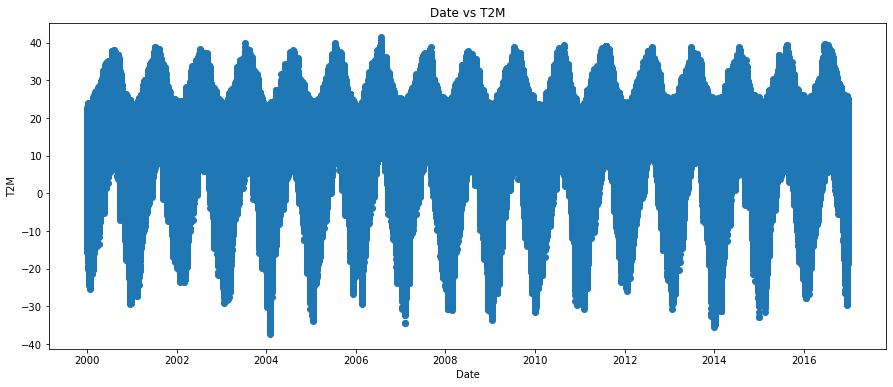

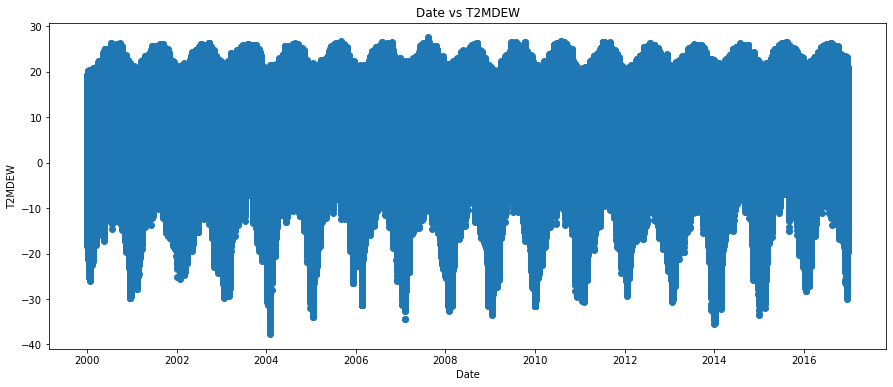

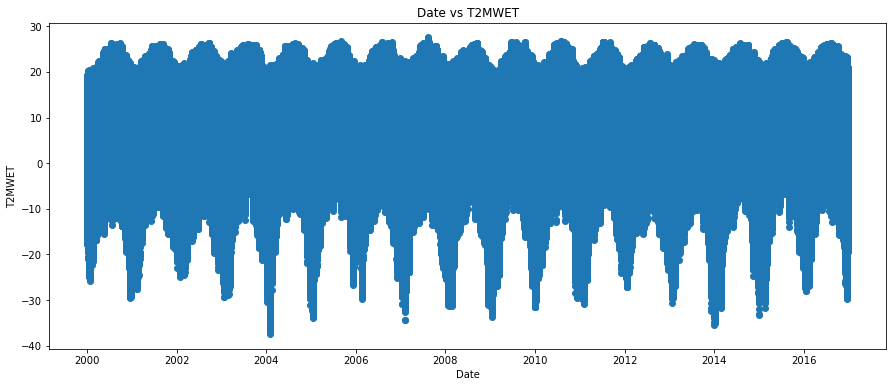

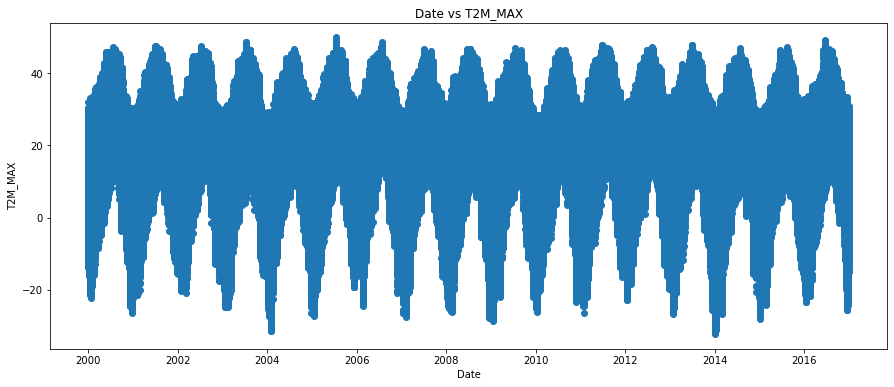

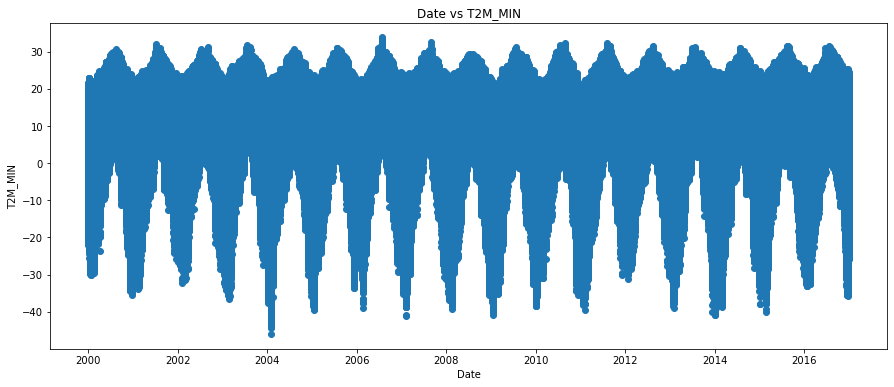

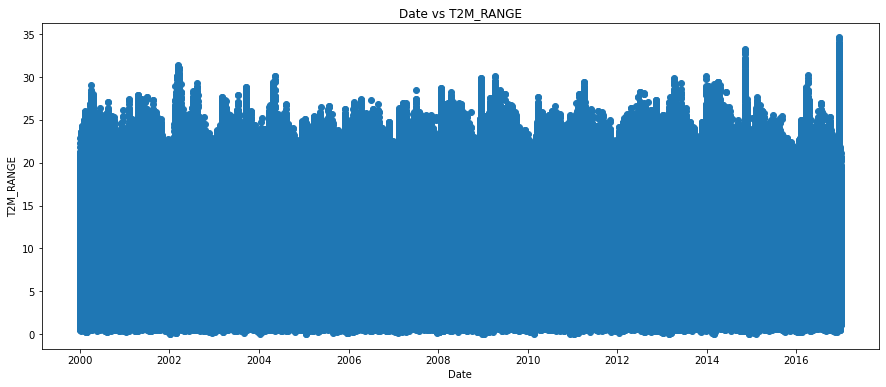

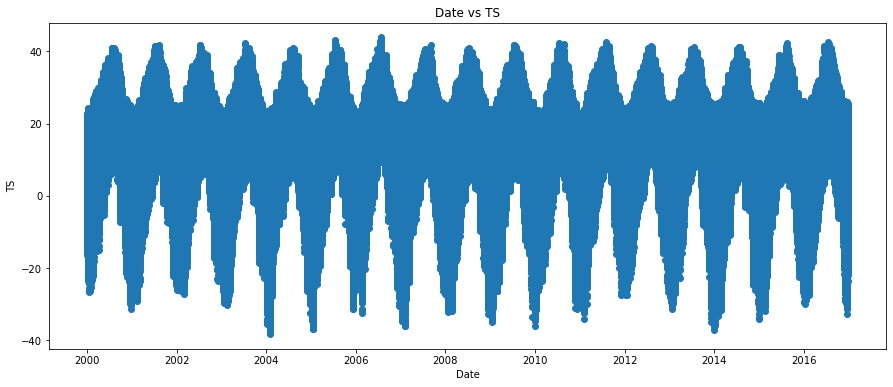

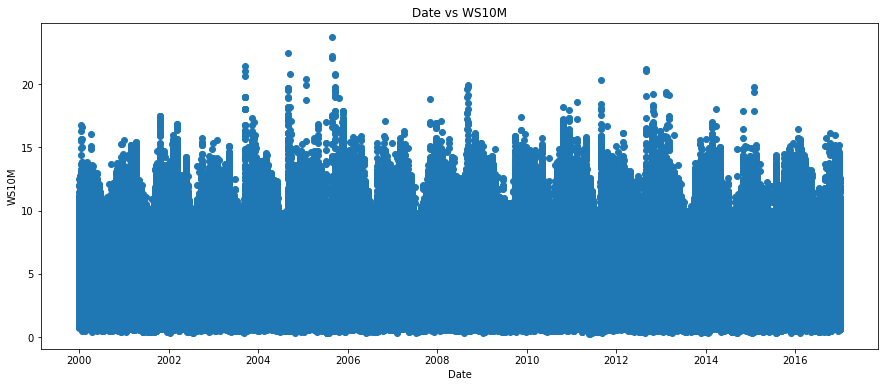

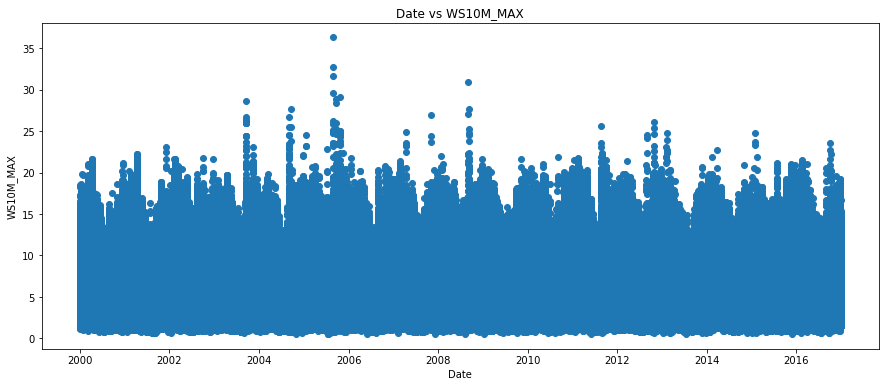

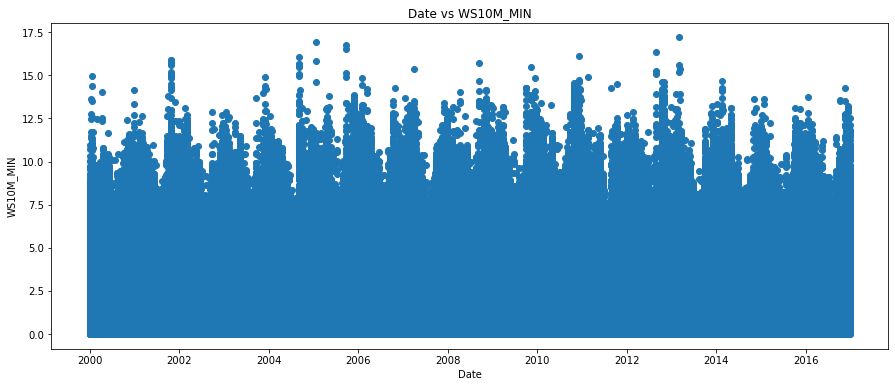

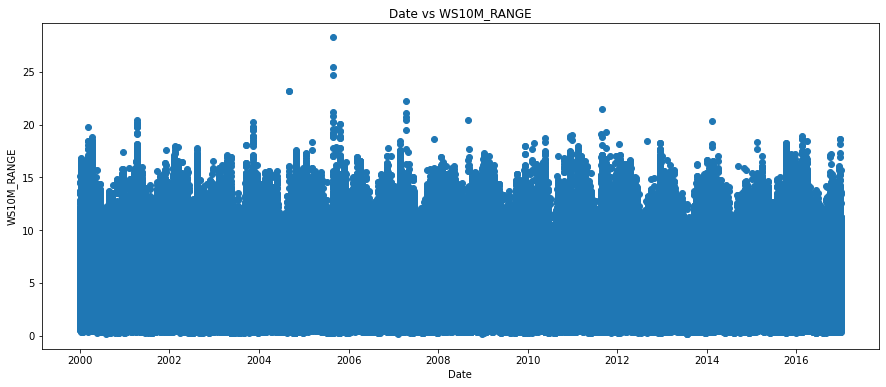

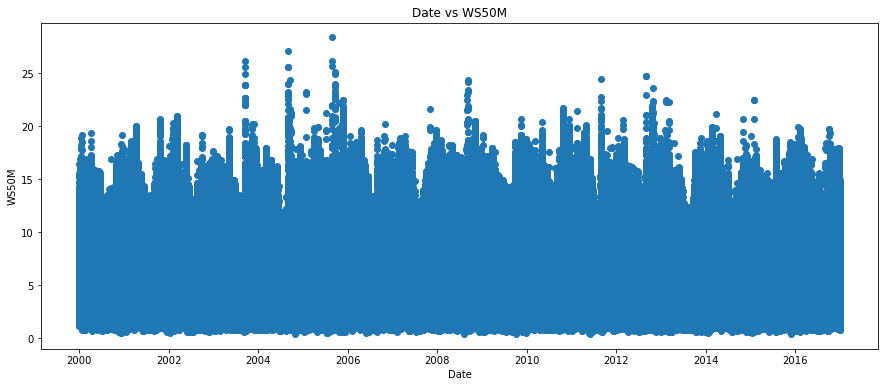

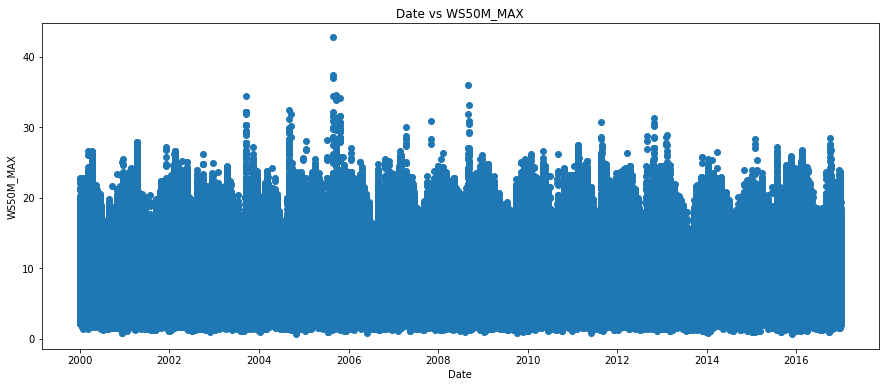

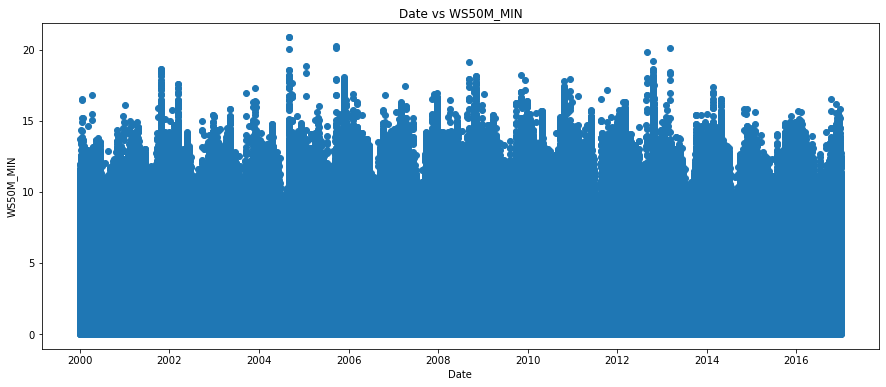

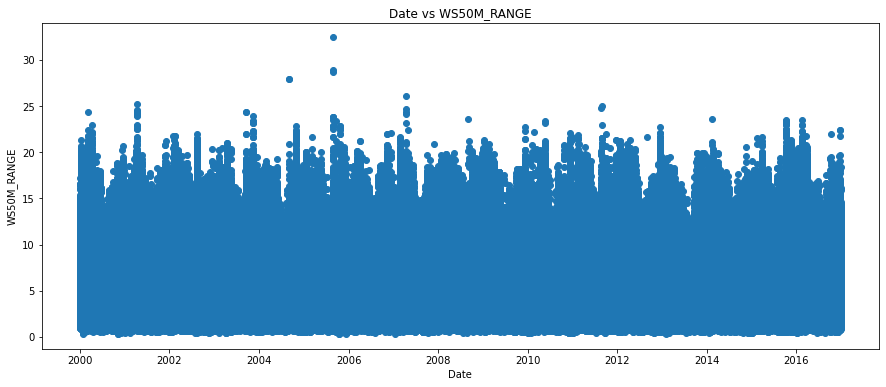

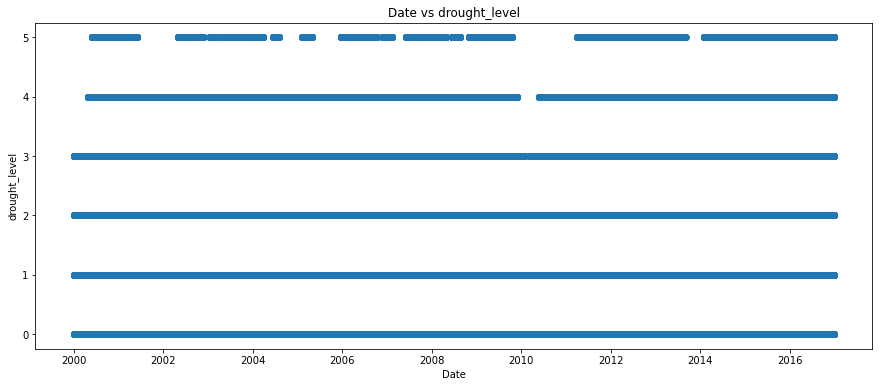

In [15]:
for i in range(1,len(train.columns)):
    plt.figure(figsize=(15, 6))
    plt.scatter(train['date'], train.iloc[:,i])
    plt.title('Date vs ' + train.columns[i])
    plt.xlabel('Date')
    plt.ylabel(train.columns[i])
#     plt.savefig('Date vs '+ train.columns[i])
    plt.show();

In [ ]:
# sns_plot = sns.pairplot(df.loc[:, "date":])
# sns_plot.savefig("pairplot");

### Machine learning

In [ ]:
# train=pd.read_csv(path+'train.csv')
# valid=pd.read_csv(path+'valid.csv')
# test=pd.read_csv(path+'test.csv')

In [16]:
# prepare features(X) and targets(y)
X_train = train.iloc[:,1:-1]
y_train = train.iloc[:,-1]
X_valid = valid.iloc[:,1:-1]
y_valid = valid.iloc[:,-1]
X_test = test.iloc[:,1:-1]
y_test = test.iloc[:,-1]

In [17]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
decision.fit(X_train, y_train)
pred = decision.predict(X_valid)
decision_score = decision.score(X_valid, y_valid)
print('decision_score:', decision_score)
f1=f1_score(y_valid, pred, average='macro')
print('f1_macro: ', f1)

decision_score: 0.576461607219202
f1_macro:  0.1890416858017413


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=1000)
RandomForest.fit(X_train, y_train)
pred = RandomForest.predict(X_valid)
RandomForest_score = RandomForest.score(X_valid, y_valid)
print('RandomForest_score:', RandomForest_score)
f1=f1_score(y_valid, pred, average='macro')
print('f1_macro: ', f1)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=1000)
AdaBoost.fit_model(X_train, y_train)
pred = AdaBoost.predict(X_valid)
AdaBoost_score = AdaBoost.score(X_valid, y_valid)
print('AdaBoost_score:', AdaBoost_score)
f1=f1_score(y_valid, pred, average='macro')
print('f1_macro: ', f1)